
# Project: Investigate the TMDb Movie Data Set.

### This data set contains information about 10,000 movies collected from the movie database,including
### adjusted budget and adjusted revenue - adjusted for 2010 dollars and accouting for inflation over time. 


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**I picked this data set as I have always had an interest in Movies and thought it would be a good chance to look at <br>
all movies through out different decades.  An opportunity to look at how much it costs to make a movie, what is the revenue<br>
and the most successful movies of all time.  The types of questions I would like to answer after looking at the data are the <br> following:**<br><br>
* To start easy I would like to see the movie with highest and lowest profit.
* I want to go by decades as I think this is where I can see the most change, if any.
* What movie has the largest budget and what movie had largest profit for each decade
* What genres are most popular for each decade?





In [1]:

import urllib.request #  import library to request and retrieve file from internet

url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv'
filename='tmbd-movies.csv'

urllib.request.urlretrieve(url,filename) # retrieve the file and store on localdirectory as 'tmdb-movies.csv'



('tmbd-movies.csv', <http.client.HTTPMessage at 0x18527f99308>)

<a id='wrangling'></a>
## Data Wrangling

In  this section I will loading necessary libraries and examine the data to see if all values are present, if there
are any columns I can get rid of, how many observations I am dealing with and datatypes to see if they make sense.  



In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# this line allows the visualizations to show in the notebook
%matplotlib inline

In [3]:
#set options on dataframe so all columns are displayed
pd.set_option('display.max_columns', None)  

#store as float instead of scientific notation - easier to read
pd.options.display.float_format = '{:.2f}'.format

In [4]:
df_movies = pd.read_csv(filename) # read the movie file and store in a dataframe

df_movies.head(1) # examine first row to get a feel of the columns and meanings and what columns can be dropped

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52


In [5]:
df_movies.shape #checking rows and column numbers

(10866, 21)

In [6]:
#these columns will not be used in any analysis and therefore will be dropped  
#I am only interested in the release year , which is why I am dropping the release_date. 
cols_to_be_dropped=['id','imdb_id','cast','homepage','tagline','keywords','overview','production_companies','release_date',
                   'director','runtime']
                   
df_movies.drop(cols_to_be_dropped,axis =1,inplace=True)
df_movies.head() #look at first 5 rows

,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.99,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.50,2015,137999939.28,1392445892.52
1,28.42,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.10,2015,137999939.28,348161292.49
2,13.11,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,2480,6.30,2015,101199955.47,271619025.41
3,11.17,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.50,2015,183999919.04,1902723129.80
4,9.34,190000000,1506249360,Furious 7,Action|Crime|Thriller,2947,7.30,2015,174799923.09,1385748801.47


In [7]:
df_movies.shape #confirming columns were dropped

(10866, 10)

In [8]:
df_movies.isnull().sum() # see if any columns have null values

popularity         0
budget             0
revenue            0
original_title     0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

**Check for duplicate rows**

In [9]:
sum(df_movies.duplicated()) # 1 row is dupicated

1

In [10]:
# query dataframe to show the duplicate row.
dupeRows = df_movies.query('original_title == "TEKKEN"')
dupeRows

,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,0.60,30000000,967000,TEKKEN,Crime|Drama|Action|Thriller|Science Fiction,110,5.00,2010,30000000.00,967000.00
2090,0.60,30000000,967000,TEKKEN,Crime|Drama|Action|Thriller|Science Fiction,110,5.00,2010,30000000.00,967000.00


In [11]:
# two rows are duplicated.  I will drop the row with index 2089
df_movies.drop(df_movies.index[2089],inplace=True)
df_movies.query('original_title == "TEKKEN"') #confirm row was dropped

,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,0.60,30000000,967000,TEKKEN,Crime|Drama|Action|Thriller|Science Fiction,110,5.00,2010,30000000.00,967000.00


**I noticed when looking at data before downloading, there were numerous 0's in the revenue and budget columns**<br>
**as well as the adjusted columns.  I will replace the 0's with Nan and drop all those rows**

In [12]:


df_movies.replace(0,np.nan,inplace=True)#replacing 0's with nan to drop these rows with .dropna method


df_movies.dropna(axis=0,how='any',inplace=True)
df_movies.reset_index(drop=True,inplace=True)

df_movies.shape #shows the new number of observations.  

(3854, 10)

In [13]:
df_movies.isnull().sum() #after dropping the rows with 0 dollars we have no more null values

popularity        0
budget            0
revenue           0
original_title    0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

I dropped 7,292 rows.  This made sense since budgets or revenue with 0 are of no use in the analysis
I had 10,866 rows before and now I have 3,574.  ALso, I have no more null values.

In [14]:
df_movies.describe()# statistics -

,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.00,3854.00,3854.00,3854.00,3854.00,3854.00,3854.00,3854.00
mean,1.19,37203696.95,107686616.10,527.72,6.17,2001.26,44239993.08,137064690.30
std,1.48,42208224.69,176539346.11,879.96,0.79,11.28,44809254.03,216111351.44
min,0.00,1.00,2.00,10.00,2.20,1960.00,0.97,2.37
25%,0.46,10000000.00,13600032.25,71.00,5.70,1995.00,13090528.47,18357350.36
50%,0.80,24000000.00,44800002.50,204.00,6.20,2004.00,30016111.91,61730679.08
75%,1.37,50000000.00,124212540.75,580.00,6.70,2010.00,60613069.68,163257654.56
max,32.99,425000000.00,2781505847.00,9767.00,8.40,2015.00,425000000.00,2827123750.41


 

## Data Cleaning 
### I am now going to dig alittle deeper in this section:
* creating a new dataframe to calculate profit
* creating a new dataframe to separate out the genres
  

I am using the adj budget and adj revenue columns to calculate profit.  This will make the playing field<br>
even for all decades as these two columns are in terms of 2010 dollars, accounting for inflation over time

In [15]:
#create a subset dataframe and add profit_adj as a column

df_movies_profit= df_movies[['original_title','release_year','budget_adj','revenue_adj']]

#subtract adjusted budget from adjusted revenue to determine adjusted profit.
df_movies_profit['profit_adj']=df_movies_profit['revenue_adj'] - df_movies_profit['budget_adj']


C:\Users\howar\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**Let's make the profit_adj more readable with commas.**

In [16]:
#format the profit_add column with appropriate commas for readability
df_movies_profit['profit_adj'] = df_movies_profit['profit_adj'].apply('{:,.2f}'.format)
df_movies_profit

C:\Users\howar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,original_title,release_year,budget_adj,revenue_adj,profit_adj
0,Jurassic World,2015,137999939.28,1392445892.52,"1,254,445,953.24"
1,Mad Max: Fury Road,2015,137999939.28,348161292.49,"210,161,353.21"
2,Insurgent,2015,101199955.47,271619025.41,"170,419,069.94"
3,Star Wars: The Force Awakens,2015,183999919.04,1902723129.80,"1,718,723,210.76"
4,Furious 7,2015,174799923.09,1385748801.47,"1,210,948,878.38"
...,...,...,...,...,...
3849,Who's Afraid of Virginia Woolf?,1966,50385110.19,226643572.37,"176,258,462.18"
3850,Torn Curtain,1966,20154044.08,87334191.00,"67,180,146.92"
3851,El Dorado,1966,31258922.36,40308088.15,"9,049,165.79"
3852,The Sand Pebbles,1966,80616176.31,134360293.85,"53,744,117.54"


**Copying the movie dataframe into a new dataframe called df_movie_copy.  Splitting out the genres using 
this dataframe.**

In [17]:
df_movie_copy=df_movies.copy() # copy movie dataframe into a movie_copy df

genres_split = df_movie_copy.genres.str.split('|',expand=True)#separate columns by | and put into dataframe
pd.options.display.float_format='{:.2f}'.format

#The split() put the genres into an array for each movie.  a movie can have 1 to 4 genres.  concate them
#movie 1 might have animation and comedy.  MOvie 2 might have thriller, sci fi, action and adventure for example
genres_concat = pd.concat([genres_split[0],genres_split[1],genres_split[2],genres_split[3],genres_split[4]])
genres_concat.shape   #the number of genres associated with all the movies                        

(19270,)

**Lets cut that number down and get only the unique genres**

In [18]:
genres_unique = genres_concat.unique()
print(genres_unique)

['Action' 'Adventure' 'Western' 'Science Fiction' 'Drama' 'Family'
 'Comedy' 'Crime' 'Romance' 'War' 'Thriller' 'Fantasy' 'History' 'Mystery'
 'Animation' 'Horror' 'Music' 'Documentary' 'TV Movie' None 'Foreign']


In [19]:
#drop tv movie and none
movie_genres_final = np.delete(genres_unique,[18,19])
print(movie_genres_final)

['Action' 'Adventure' 'Western' 'Science Fiction' 'Drama' 'Family'
 'Comedy' 'Crime' 'Romance' 'War' 'Thriller' 'Fantasy' 'History' 'Mystery'
 'Animation' 'Horror' 'Music' 'Documentary' 'Foreign']


In [20]:
movie_genres_final.shape #number of unique genres

(19,)

**creating a matrix filled with zeros.  this matrix will be used to keep track of all occurences of 
the unique genres for each movie.** 

In [21]:
genres_matrix = np.zeros((len(df_movie_copy),len(movie_genres_final)))
genres_matrix.shape # number of rows and columns- rows are number of rows of the movie database and columns are the genres.

(3854, 19)

**creating a dataframe from the matrix created above and the genres are the columns.**

In [22]:
movie_genres = pd.DataFrame(genres_matrix,columns=movie_genres_final)
movie_genres.head(2)

,Action,Adventure,Western,Science Fiction,Drama,Family,Comedy,Crime,Romance,War,Thriller,Fantasy,History,Mystery,Animation,Horror,Music,Documentary,Foreign
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


**changing 'original_title to 'movie' and moving it to the first column of dataframe**

In [23]:
movie_genres.insert(0,'year',df_movie_copy['release_year'])# put movie as first column in dataframe

In [24]:
movie_genres.head(2)#check columns to verify

,year,Action,Adventure,Western,Science Fiction,Drama,Family,Comedy,Crime,Romance,War,Thriller,Fantasy,History,Mystery,Animation,Horror,Music,Documentary,Foreign
0,2015,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2015,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


**making all columns lower case and replacing science fiction with science_fiction.  using _ instead**

In [25]:
#replace spaces with _ and convert to all lower case
movie_genres.rename(columns=lambda x: x.strip().lower().replace(' ','_'),inplace=True)
movie_genres.head(1)

,year,action,adventure,western,science_fiction,drama,family,comedy,crime,romance,war,thriller,fantasy,history,mystery,animation,horror,music,documentary,foreign
0,2015,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


**split all genres and loaded into all_genres_split.  This is used to hold each movies genre as an array
For example  jurassic park will have [Action,Adventure, science Fiction, Thriller]  I will then need to check
each genre separately to see if it matches a column genre by indexing all_genres_split**

In [26]:

all_genres_split = df_movie_copy.genres.str.split('|')

all_genres_split

0       [Action, Adventure, Science Fiction, Thriller]
1       [Action, Adventure, Science Fiction, Thriller]
2               [Adventure, Science Fiction, Thriller]
3        [Action, Adventure, Science Fiction, Fantasy]
4                            [Action, Crime, Thriller]
                             ...                      
3849                                           [Drama]
3850                               [Mystery, Thriller]
3851                                 [Action, Western]
3852          [Action, Adventure, Drama, War, Romance]
3853                      [Adventure, Science Fiction]
Name: genres, Length: 3854, dtype: object

**Going thru the whole movie database as outside loop.(3853 rows) then the inner loop is the lengh of the
genres in the specific movie(so for jurassic world which is the firs movie that number will be 4(it could be from 1-4))
the inner most loop grabs the columns for matching.**

**check to see if genre matches the column genre for that movie
note:  need to convert to lowercase and add the _ to science fiction instead of space.**

**If there is a match the dataframe is update for that movie with a 1 in the matching column.  jurassic world will have 4 1's
as seen below since that movie has all those genres**

### Note:  I know this isn't the best way, but I wanted an accurate count and this is all I could think of to get it to work
### Would love to see a better way.  For the number of rows its still pretty speedy.

In [27]:
for i in range(df_movie_copy.shape[0]):
    for gen in range(len(all_genres_split[i])):
        for genres in movie_genres.columns:
            
            if all_genres_split[i][gen].lower().replace(' ','_') == genres:
               
               movie_genres.loc[i,genres] = 1
                



In [28]:
movie_genres.head()

,year,action,adventure,western,science_fiction,drama,family,comedy,crime,romance,war,thriller,fantasy,history,mystery,animation,horror,music,documentary,foreign
0,2015,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2015,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2015,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2015,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2015,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


<a id='eda'></a>
## Exploratory Data Analysis



###  - Determine highest and lowes profitable movies

**movie with the lowest profit**

In [29]:
# movie with the lowest profit-  actually a loss.
lowest_profit_movie=df_movies_profit['profit_adj'].min()
df_movies_profit.query('profit_adj == @lowest_profit_movie')

,original_title,release_year,budget_adj,revenue_adj,profit_adj
3185,Center Stage,2000,22793258.06,21781395.69,"-1,011,862.37"


**what was 'Center Stage'  genre?**

In [30]:
movie_genre = df_movies.query('original_title == "Center Stage"')

print('Center Stage genres are {}'.format(movie_genre['genres'].to_string(index=False))) # remove index when printing

Center Stage genres are  Drama|Music


**movie with the highest profit.  Minion - Family, animation, adventure and comedy is definitely the ticket**

In [31]:
#movie with highest profit
highest_profit_movie=df_movies_profit['profit_adj'].max()
df_movies_profit.query('profit_adj == @highest_profit_movie')

,original_title,release_year,budget_adj,revenue_adj,profit_adj
8,Minions,2015,68079970.04,1064192016.80,"996,112,046.75"


**what was Minions genre**

In [32]:
movie_genre = df_movies.query('original_title == "Minions"')

print('Minions genres are {}'.format(movie_genre['genres'].to_string(index=False))) # remove index when printing

Minions genres are  Family|Animation|Adventure|Comedy


In [33]:
#subset popularity, vote_count release year budget_adj
df_popularity = df_movies[['popularity','vote_count','release_year','revenue_adj','budget_adj']] 
df_popularity.loc[:,'release_year'] = pd.to_datetime(df_movies['release_year'],format='%Y')# convert to date format
df_popularity.set_index(['release_year'],inplace=True) # set release_year as index to use wih matplotlib


C:\Users\howar\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


**get the total count of genres and sort descending to show in a histogram**

In [85]:
#get the genre count and sort descending
genre_sum = movie_genres.loc[:,'action': 'foreign'].sum(axis=0).sort_values(ascending=False)
genre_sum #verify


drama             1756.00
comedy            1358.00
thriller          1204.00
action            1085.00
adventure          749.00
romance            667.00
crime              651.00
science_fiction    519.00
horror             463.00
family             425.00
fantasy            396.00
mystery            344.00
animation          201.00
music              136.00
history            129.00
war                119.00
western             52.00
documentary         35.00
foreign             13.00
dtype: float64

**display a histogram of vote counts and a bar chart for genre counts side by side**

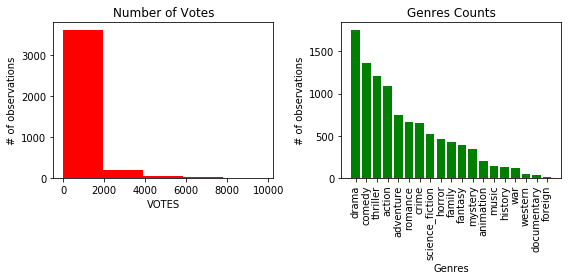

In [142]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(8,4))
    
    
#format x and y coordinates
ax1.hist(df_popularity['vote_count'],bins=5,color='red')

#set xlabel to votes
ax1.set_xlabel('VOTES')

#set ylabel to observations
ax1.set_ylabel('# of observations')

#set title for ax1 axis
ax1.set_title('Number of Votes')

#format x and y coordinates second axis show a stepfilled histogram
ax2.bar(genre_sum.index,genre_sum, color='green')

#set the ax2 axis label to genres
ax2.set_xlabel('Genres')

#set the ax2 y axis to # of observations
ax2.set_ylabel('# of observations')

#set title for ax2 axis
ax2.set_title('Genres Counts')

#set the xticks with the genres
ax2.set_xticklabels(genre_sum.index,rotation=90)

fig.tight_layout()
plt.show()

**lets see how budget has changed over the years wich a scatter plot**

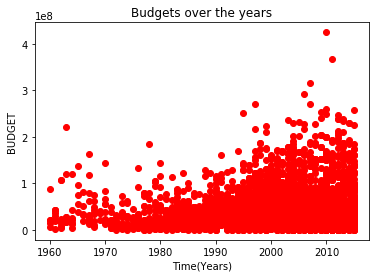

In [35]:
fig,ax = plt.subplots()  # setup the figure and axis for plotting

#plot the x and y axis as popularity
ax.scatter(df_popularity.index.year, df_popularity['budget_adj'],color='red')

# set x and y label
ax.set_xlabel('Time(Years)')
ax.set_ylabel('BUDGET')
ax.set_title('Budgets over the years')
plt.show()


                      
                      
                      


                      
                      

**we can see as a general rule the budgets have gone up over the years with a few outliers
  surprising to see such outliers in the early sixties compared with the seventies to the nineties**

# Lets go deeper and explore all movies by decades

**this function -decadeMovies is a common function that pulls off each decade and converts year to 
  datetime format to be used with matplotlib. It takes the decade_name such as 'sixties_movies' as one argument
  and the decade_min such as '1960' and the decade_max such as '1969' to be used in the query and returns
  all the movies for the specific decade passes in to function**
  

In [36]:
def decadeMovies(decade_name, decade_min,decade_max):
    
    
        decade_name = df_movies_profit.query('@decade_min <= release_year <= @decade_max')
    
        decade_name.loc[:,'release_year'] = pd.to_datetime(decade_name['release_year'],format='%Y')
        decade_name.set_index(['release_year'],inplace=True)
        return decade_name
    
    
        
        
                                   
                           
                                                       
    

In [37]:
import matplotlib.pyplot as plt # import the plotting library
%matplotlib inline 

**I added commas and periods to profit_adj for readable purposes  and now need to convert back to a float
for use in matplotlib.  Using a regualr expression to get rid of anything not numeric and then
convert to a float**

In [38]:

df_movies_profit['profit_adj']= df_movies_profit['profit_adj'].str.replace(r'\D+', '').astype(float)
df_movies_profit.head() # verify


C:\Users\howar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,original_title,release_year,budget_adj,revenue_adj,profit_adj
0,Jurassic World,2015,137999939.28,1392445892.52,125444595324.00
1,Mad Max: Fury Road,2015,137999939.28,348161292.49,21016135321.00
2,Insurgent,2015,101199955.47,271619025.41,17041906994.00
3,Star Wars: The Force Awakens,2015,183999919.04,1902723129.80,171872321076.00
4,Furious 7,2015,174799923.09,1385748801.47,121094887838.00


**subset all movies for the 60s - 90's, 2000-2015 and see the budgets and  profits side by side
as well as the movie for the highest budget and profit**

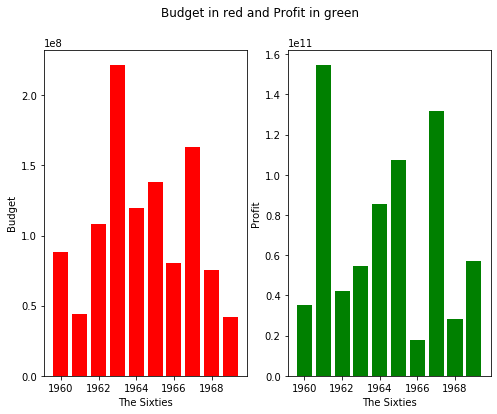

Highest budgeted  movie for Sixties is : Cleopatra
Highest profitable  movie for Sixties is : One Hundred and One Dalmatians


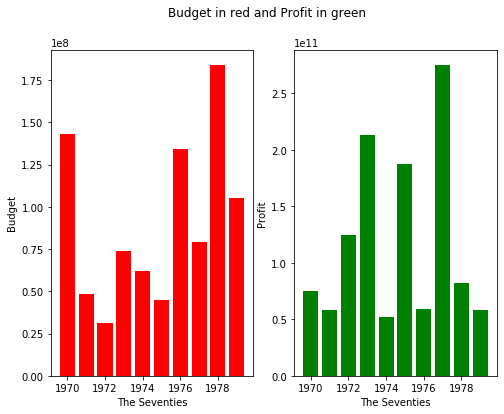

Highest budgeted  movie for Seventies is : Superman
Highest profitable  movie for Seventies is : Star Wars


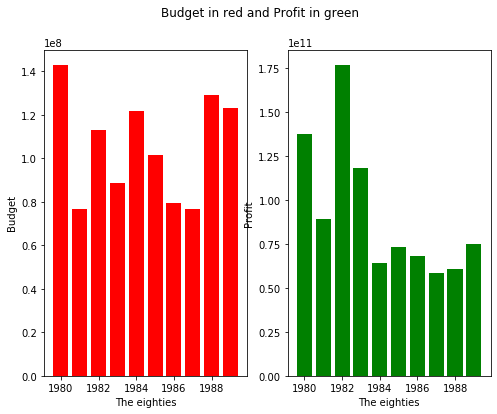

Highest budgeted  movie for Eighties is : Superman II
Highest profitable  movie for Eighties is : E.T. the Extra-Terrestrial


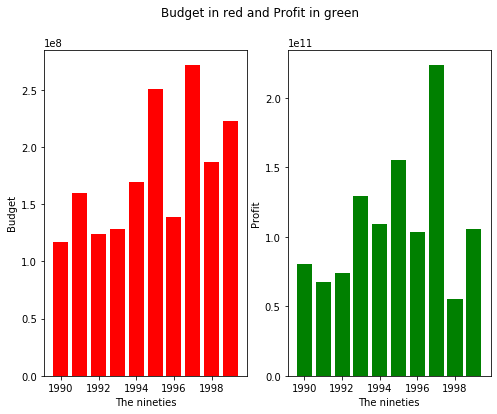

Highest budgeted  movie for Nineties is : Titanic
Highest profitable  movie for Nineties is : Titanic


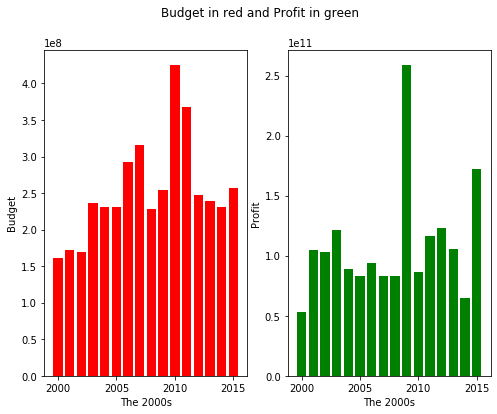

Highest budgeted  movie for  2000s is : The Warrior's Way
Highest profitable  movie for  2000s is : Avatar


In [44]:
# get subset for all 60's movies
sixties_movies = decadeMovies('sixties',1960,1969)
plotDecadesBudgetProfit(sixties_movies,'The Sixties','Budget for movies in the 60s')
printBudgetProfitMovies(sixties_movies,'Sixties')


# get subset for all 70's movies
seventies_movies = decadeMovies('seventies',1970,1979)
plotDecadesBudgetProfit(seventies_movies,'The Seventies','Budget for movies in the 70s')
printBudgetProfitMovies(seventies_movies,'Seventies')

#subset for all 80's movies
eighties_movies = decadeMovies('eighties',1980,1989)
plotDecadesBudgetProfit(eighties_movies,'The eighties','Budget for movies in the 80s')
printBudgetProfitMovies(eighties_movies,'Eighties')

#subset for all 90's movies
nineties_movies = decadeMovies('nineties',1990,1999)
plotDecadesBudgetProfit(nineties_movies,'The nineties','Budget for movies in the 90s')
printBudgetProfitMovies(nineties_movies,'Nineties')

#subset the 2000's -  I am grouping 2000 - 2015 as 2015 is last year for movies in database
twoThousands_movies = decadeMovies('twoThousands',2000,2015)
plotDecadesBudgetProfit(twoThousands_movies,'The 2000s', 'Budget for movies from 2000 - 2015')
printBudgetProfitMovies(twoThousands_movies,' 2000s')




**This function gets the movie names with the highest budget and profit for the specific decade
the argument decade is the decades dataframe and decade_name is a string for the decade such as 'sixties'**

In [42]:
def printBudgetProfitMovies(decade, decade_name):
    
    highest_budget=decade[decade['budget_adj'] == decade['budget_adj'].max()]
    #get the movie with highest budget
    highest_movie_budget = highest_budget['original_title']

    highest_profit=decade[decade['profit_adj'] == decade['profit_adj'].max()]
    highest_movie_profit = highest_profit['original_title']

    
    print(f'Highest budgeted  movie for {decade_name} is : {highest_movie_budget[0]}')
    print(f'Highest profitable  movie for {decade_name} is : {highest_movie_profit[0]}')

**plot the budget and profit side by side for all decades
  the decade_movie argument is the dataframe for the specific decade -  such as 'sixties_movies
  the xlabel is the decade such as 'sixties**

In [43]:
def plotDecadesBudgetProfit(decade_movie,xlabel,title):
    fig, (ax1,ax2)=plt.subplots(1,2,figsize=(8,6))
    fig.suptitle('Budget in red and Profit in green')
    
    #format x and y coordinates.  pulled off just the year
    ax1.bar(decade_movie.index.year,decade_movie['budget_adj'],color='red')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('Budget')
    #format x and y coordinates.  pulled off just the year
    ax2.bar(decade_movie.index.year,decade_movie['profit_adj'],color='green')
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel('Profit')

    plt.show()

# let's see the total number of genres 

**separate out the decades from the genres dataframe**

In [48]:
def decadeGenres(decade_name, decade_min,decade_max):
    
    
        decade_name = movie_genres.query('@decade_min <= year <= @decade_max')
    
        decade_name.loc[:,'year'] = pd.to_datetime(decade_name['year'],format='%Y')
        decade_name.set_index(['year'],inplace=True)
        return decade_name


**plot the genres for each decade**

In [49]:
def plotDecadeGenres(decade,title):
    # sum  up the genres for the decade
    genre_sum_count_decade = decade.loc[:,'action':'foreign'].sum(axis=0)
    
    
    fig,ax=plt.subplots()

    #set up x and y coordinates.  x are the genres.  I use 1: to get only the genres which started in column 1.
    # the genres_sum_cnt_decade is calculated above and is the total sum for all genres for the specific decade.
    ax.bar(decade.columns[0:],genre_sum_count_decade)
    
    # Set the x-axis tick labels to the genre names
    ax.set_xticklabels(decade.columns[0:], rotation=90)

    # Set the y-axis label
    ax.set_ylabel('Number of movies with genre')

    ax.set_title(title)
    plt.show()

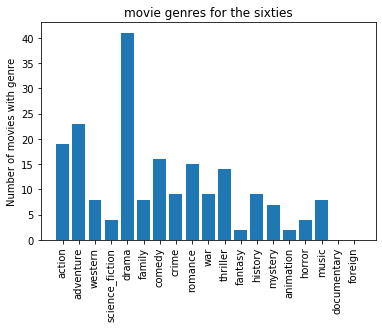

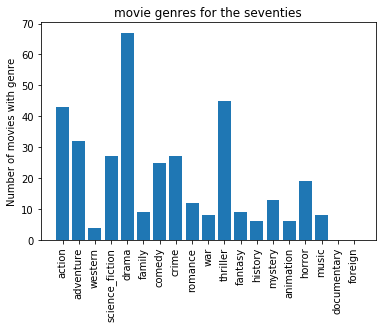

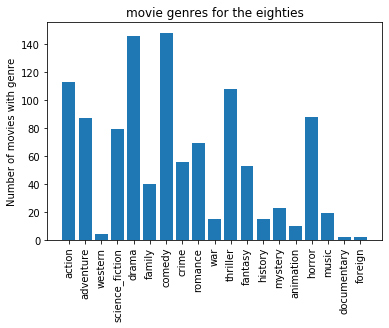

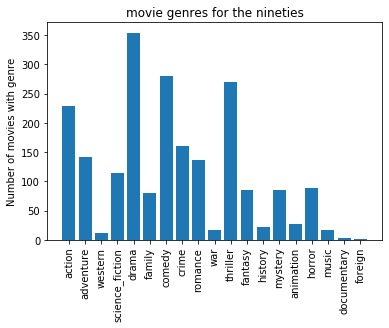

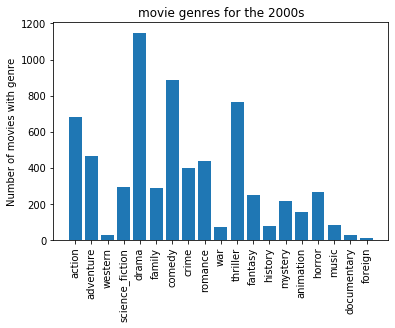

In [50]:
#split the genres by decade
sixties_genres = decadeGenres('sixties',1960,1969)
#plot the sixties genres
plotDecadeGenres(sixties_genres,'movie genres for the sixties')

#seventies
seventies_genres = decadeGenres('seventies',1970,1979)
plotDecadeGenres(seventies_genres,'movie genres for the seventies')

#Eighties
eighties_genres = decadeGenres('eighties',1980,1989)
plotDecadeGenres(eighties_genres,'movie genres for the eighties')

#nineties
nineties_genres = decadeGenres('nineties',1990,1999)
plotDecadeGenres(nineties_genres,'movie genres for the nineties')

#the 2000s
twoThousands_genres = decadeGenres('The 2000s',2000,2015)
plotDecadeGenres(twoThousands_genres,'movie genres for the 2000s')





**Interesting to see how the genres have changed over the decades.  However, drama as a whole has always being the most
popular.**

<a id='conclusions'></a>
# Conclusions

## It was very interesting splitting out the movies by decades to see how our times , what was going on in the world changed our viewing habits and what movies were created.  

###  Through out the decades the movie with the highest budget did not make the highest profit except for one year only.  1997 Titanic was the most expensive movie to produce and also had the highest profit.

### It appears that the Eighties were a great time to make movies and for all genres.

### The genres in the sixities and seventies made a decent amount of war movies.  Made sense as vietnam was still going on and then just ending.  But the eighties seemed to do the best in all genres.  That was the decade for the horror films.  

### Documentary and Foreign films started in the eighties as shown by the IMDB database.  I don't think that is correct, its just that they were not recorded., 

### Drama was clearly the most popular genre.  My guess is that women attend movies more than men and drama movies seem to bend toward that demographic.

### Musicals were more popular in the sixties, seventies and eighties.

### Comedy peaked in the eighties , but is still popular in the nineties and 2000s.

# Limitations:
### Dropped 7,000 rows because of missing data.  This will have an impact on the monetary observations of the movies such as doing analysis for budget, revenue and profit.
### The vote counts for movies seem small which can effect populartiy and user ratings on a whole.  Also I believe the vote counts are more prevalent now with the internet than  the 60s-80s.  
 